In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import manifold, decomposition, cluster, metrics

In [2]:
df = pd.read_csv("data/flipkart_com-ecommerce_sample_1050.csv")
df['product_category'] = df['product_category_tree'].apply(lambda x: x.split(" >>")[0][2:])
df = df[['image', 'product_category']]
text_features = pd.read_csv('data/data_lemmatization_tfidf.csv', index_col=0)
image_features = pd.read_csv('data/im_features_sift.csv', index_col=0)
all_features = pd.concat([text_features, image_features], axis=1)

In [3]:
print("text_features shape :", text_features.shape) 
print("image_features shape :", image_features.shape) 
print("all_features shape :", all_features.shape)

text_features shape : (1050, 4636)
image_features shape : (1050, 595)
all_features shape : (1050, 5231)


## Réductions de dimension


### Réduction de dimension PCA

- La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
- L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [4]:
print("Dimensions dataset avant réduction PCA : ", all_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca = pca.fit_transform(all_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 5231)
Dimensions dataset après réduction PCA :  (1050, 823)


###  Réduction de dimension T-SNE
-  Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [5]:
tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = df["product_category"]
print(df_tsne.shape)

C:\Users\Quentin\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1050, 3)


## Analyse visuelle : affichage T-SNE

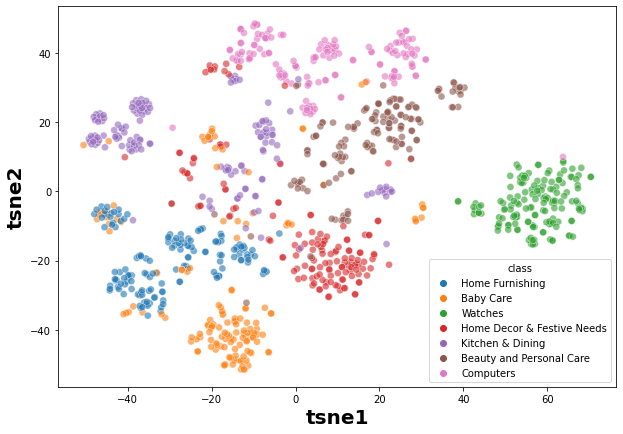

In [9]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.xlabel('tsne1', fontsize = 20, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 20, fontweight = 'bold')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

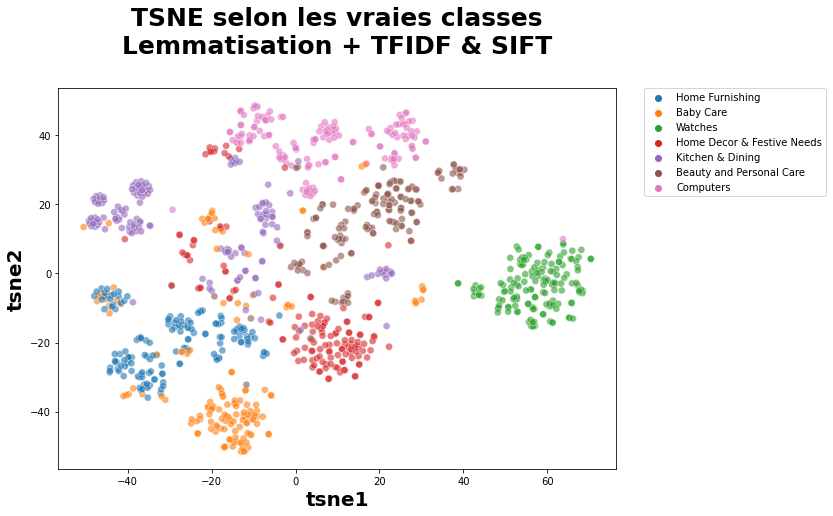

In [15]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes\nLemmatisation + TFIDF & SIFT',
          fontsize = 25, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 20, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 20, fontweight = 'bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

## Analyse mesures : similarité entre catégories et clusters

### Création de clusters à partir du T-SNE

In [16]:
cls = cluster.KMeans(n_clusters=7, random_state=42)
cls.fit(X_tsne)
df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


In [17]:
labels = df["product_category"]
ari = metrics.adjusted_rand_score(labels, cls.labels_)
print("ARI : %0.3f" % ari)

ARI : 0.535


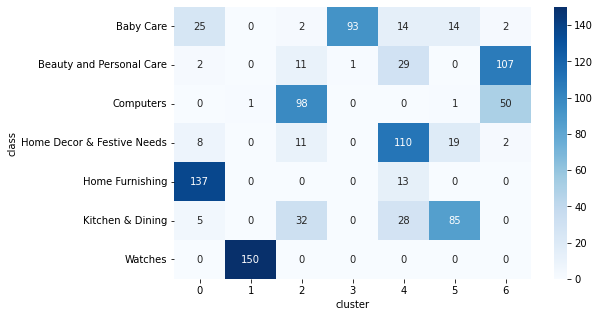

In [18]:
plt.figure(figsize=(8, 5))
conf_mat = pd.crosstab(df_tsne['class'], df_tsne['cluster'])
sns.heatmap(conf_mat,
            annot=True,
            fmt="d",
            cmap="Blues")
plt.show()